<a href="https://colab.research.google.com/github/keunsooyoon/python202206/blob/main/pythonbasic11_Machine_Learning_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. 문  제 파  악 - 배경 이해, 분석 목표 설정, 분석 일정, 데이터 확보

# G 드라이브 연결
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [6]:
# 모듈 설정
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# https://dacon.io/competitions/open/235539/data

train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/train.csv')
test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/test.csv')
submission = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/submission.csv')

In [8]:
# 2. 데이터   탐색 - 결측치/이상치 파악, 데이터 분포, 상관 관계 

print(train.shape)
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [11]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
# 통계 정보 요약
train.describe()

# 기본적으로는 숫자 데이터 열만 요약

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train.describe(include='all') # 문자를 포함한 모든 열의 요약 통계 정보

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


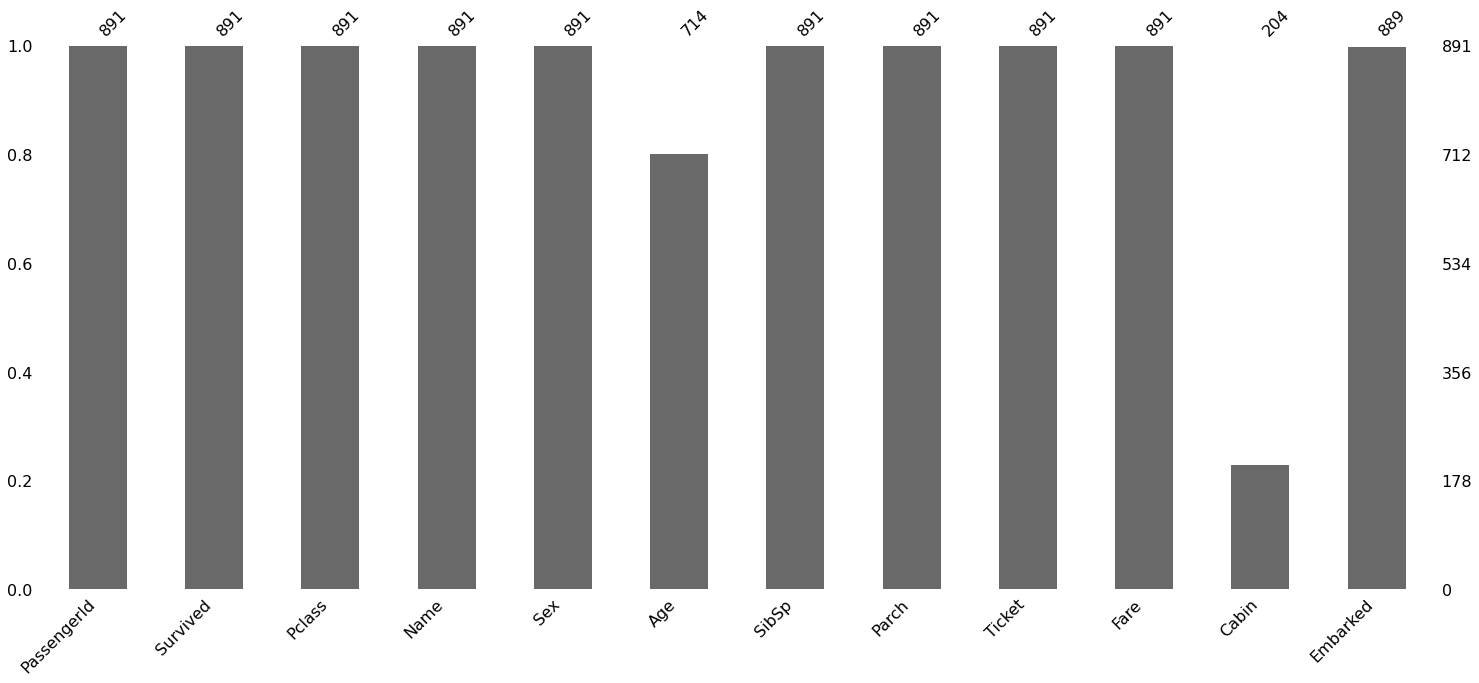

In [14]:
# 결측치 확인

import missingno as msno 

msno.bar(train)  # 결측치 갯수 확인

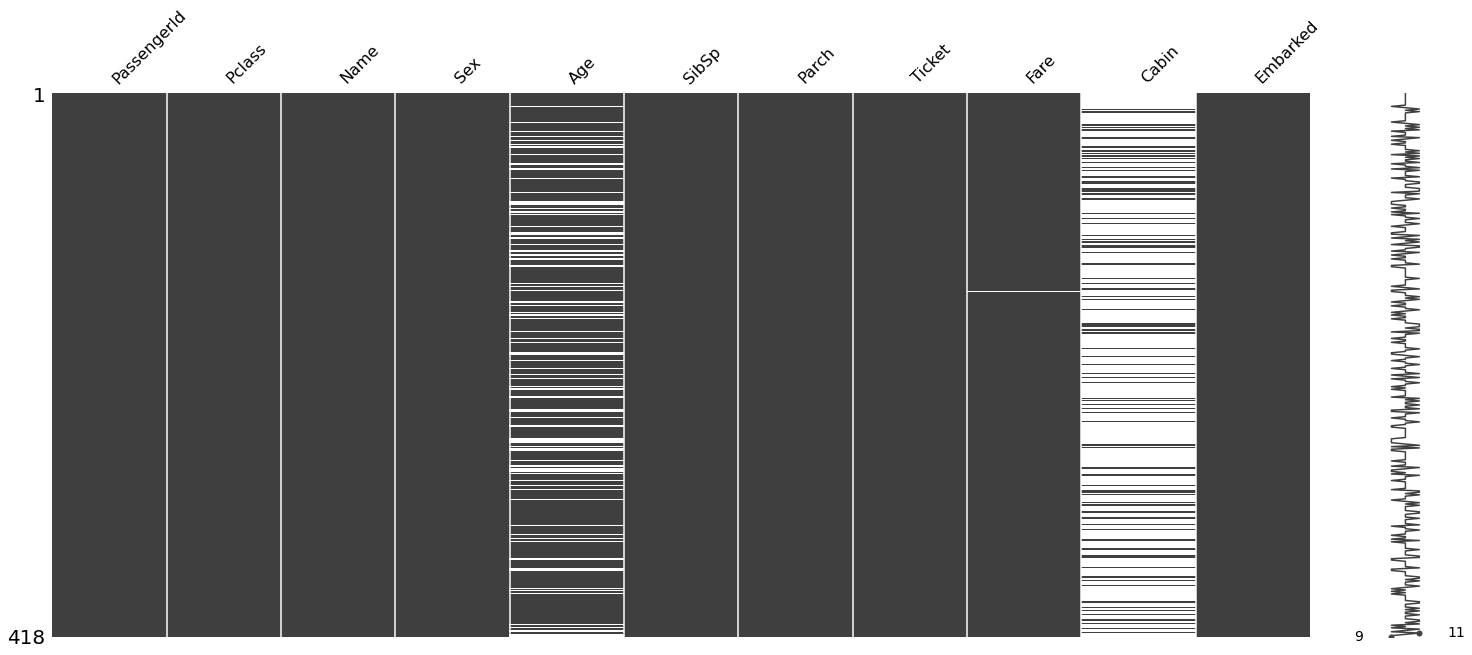

In [15]:
msno.matrix(test)  # 결측치 분포 확인

In [16]:
# 상관 관계 분석

train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


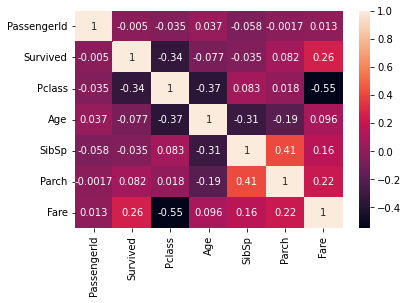

In [17]:
# sns 로 그림으로 표현
sns.heatmap(data=train.corr(), annot=True) 

In [18]:
# 3. 데이터 전처리 - 결측치/이상치 처리, 자료형 변환, 속성을 추가 생성 

# 데이터 결합 (위 아래 방향으로 결합)

# 분석을 끝내고 학습을 시킬때 다시 분리 하기 편하도록 split  열을 만들어 각각 이름을 부여한다. 
train['Split'] = 'Train'
test['Split'] = 'Test'

data = pd.concat([train, test], axis=0)

data.shape

(1309, 13)